In [2]:
!pip install -q datetime
!pip install -q astroquery
!pip install -q pymcel
!pip install -q celluloid


' !pip install -q datetime\n!pip install -q astroquery\n!pip install -q pymcel\n!pip install -q celluloid '

In [3]:
import spiceypy as spy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astroquery.jplhorizons import Horizons
from astropy import constants
import datetime
import spiceypy as spy
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from celluloid import Camera
import math
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


<p>
<img src="https://drive.google.com/uc?id=1ZHUKcwzA5c-PKUwoGmBG3TsHk6TmZ-Y0" align="left" width="250">
</p>
<p>
<h1><b><center>Mecánica Celeste</center></b></h1>
<h2><b><center>Prof. Jorge I. Zuluaga</center></b></h1>
<h2><b><center>Tarea 1</center></b><h2>
<h3><b><center>Constantes de movimiento del sistema solar</center></b><h3>
<h5><center><b>Asignada</b>: 15 de Agosto de 2023</center><h5>
<h5><center><b>Entrega</b>: 29 de Agosto de 2023</center><h5>
</p>

<hr/>
<b>Nombre</b>: Bryan Camilo Restrepo Arcila
<br/>
<b>Cédula</b>:1000567825
<br/>
<b>Última actualización</b>:2023-08-28
<hr/>

Repositorio de los codigos del curso:

https://github.com/andromedalactea/celestial_mechanics.git

## Enunciado

**Objetivo**: El objetivo de esta tarea es poner a prueba los resultados vistos en clase sobre las constantes en el problema de los N-cuerpos, en este caso aplicados al sistema solar.  Para ello usaremos el sistema de datos del JPL Horizons y el paquete `astroquery`.

**Procedimiento**:

Para conseguir el objetivo:

1. Obtener las masas, posiciones y velocidades de los planetas del sistema solar (8 planetas) y del Sol durante 20 años (por ejemplo entre 2000 y 2020), cada 3 meses. Use para ello Astroquery y SPICE (para las masas).

2. Para cada punto en el tiempo calcular:

   - El momentum lineal de cada cuerpo.
   - El momentum angular de cada cuerpo.
   - La energía cinética de cada cuerpo.
   - La energía potencial gravidtacional de todo el sistema.

3. Usando el valor de cada una de las cantidades anteriores vamos a calcular el valor de las cuadraturas del sistema:

   - Calcular el momentum lineal total (3 cuadraturas).
   - Calcular el momentum angular total (3 cuadraturas).
   - Calcular la energía total total (1 cuadratura).

   Es muy importante tener en cuenta que el valor de cada una de las cuadraturas puede ser inmenso (las masas del sistema solar son inmensas). Por lo tanto, debemos dividir cada cuadratura por el valor característico de. para ello calcule el valor promedio del momentum lineal, angular y energía cinética del Sol.

4. Hacer gráficos de las 10 cuadraturas.

5. El momentum angular total del sistema solar define el Plano de Laplace del sistema. El momentum angular de cada uno de los cuerpos del sistema solar define la inclinación de la órbita osculatriz del cuerpo respecto al plano de Laplace. Calcular, para cada tiempo, el ángulo entre el plano de Laplace y la órbita osculatriz de cada cuerpo (incluyendo el Sol).

Ayuda: el ángulo entre dos vectores se calcula usando la propiedad del producto punto A⋅ B = A B cos θ.

6. Haga un gráfico del ángulo de la órbita osculatriz de cada cuerpo como función del tiempo.

7. Calcule el valor promedio de la inclinación orbital de cada planeta en grados respecto al plano invariante de Laplace.

**Resultados esperados**:

- Este notebook con el procedimiento debidamente comentado.

- Gráficos mínimos:
  - Gráfico de las 10 cuadraturas normalizadas (divididas por el valor para el Sol).

  - Gráfico de la inclinación de la órbita osculatriz de cada planeta y el Sol.

- Datos mínimos:
  - Valor de la inclinación orbital de cada planeta

- Gráficos opcionales:
  - Gráfico de las órbitas de los planetas.
  - Gráfico de las magnitudes del momentum lineal y angular total como función del tiempo.

- En caso de utilizar ayudas como `ChatGPT` o códigos de `Stack Over Flow` debe citar debidamente la fuente, pero también entender a cabalidad el código, el profesor puede pedir justificación.

## Solución

## 1. Obtener las masas, posiciones y velocidades de los planetas del sistema solar (8 planetas) y del Sol durante 20 años (por ejemplo entre 2000 y 2020), cada 3 meses. Use para ello Astroquery y SPICE (para las masas).

In [4]:
#Praparemos la información que se pouede obtener de SPICE

#Codigo de la clase poara importar la libreria de SPICE la cual contiene la data necesaria para encontrar la masa de los planetas y el sol
!wget https://naif.jpl.nasa.gov/pub/naif/generic_kernels/pck/gm_de440.tpc -O gm_de440.tpc
spy.furnsh('gm_de440.tpc')

#Con el siguiente codigo obtenemos la masa de los planetas, y poniendo esta en un datfarame con los planetas como indices
dic={}
for i in range(1,9) :
  n,dato = spy.bodvrd(f'{i}99','GM',1)
  dato=dato/((constants.G.value)/10**9)/constants.M_earth.value  #G debe de estar en las unidades correctas km^3/(kg*s^2)
  dic[f'{i}99']=dato[0]

#Añadiendo la masa del sol
dic['1099']=constants.M_sun.value/constants.M_earth.value

#Para más adelante en el codigo expresemos G en las unidades correctas
G=constants.G.value*constants.M_earth.value*(5033865)**2/(1.496e11)**3  #m^3/(kg*s^2) a ua^3/(M⊕*τ^2)

--2023-08-28 10:49:23--  https://naif.jpl.nasa.gov/pub/naif/generic_kernels/pck/gm_de440.tpc
Resolving naif.jpl.nasa.gov (naif.jpl.nasa.gov)... 137.78.232.95
Connecting to naif.jpl.nasa.gov (naif.jpl.nasa.gov)|137.78.232.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12708 (12K) [text/plain]
Saving to: ‘gm_de440.tpc’

gm_de440.tpc        100%[===================>]  12.41K  --.-KB/s    in 0.001s  

2023-08-28 10:49:24 (9.24 MB/s) - ‘gm_de440.tpc’ saved [12708/12708]



In [18]:
# Lista de IDs de los planetas
id_planets = list(np.arange(199, 1199, 100))
id_planets.remove(999)  # Quitando a Pluton de la lista

# Diccionario con los nombres de los planetas para una mejor identificación
planet_names = {
    199: 'Mercury',
    299: 'Venus',
    399: 'Earth',
    499: 'Mars',
    599: 'Jupiter',
    699: 'Saturn',
    799: 'Uranus',
    899: 'Neptune',
    1099:'sun'
}

# Inicializar el DataFrame final
df_planets_sun_information = None

for i in id_planets:
    # Extrayendo los datos de los planetas en referencia al baricentro del sistema solar
    information = Horizons(id=str(i), location='0', epochs={'start': '2002-01-01', 'stop': '2022-12-31', 'step': '90d'}).vectors().to_pandas()[['datetime_str', 'x', 'y', 'z', 'vx', 'vy', 'vz']]

    #Llevandolo a unidades Canonicas:
    information['vx']=information['vx']*58.26232638888889   #este valor es el valor del timepo para las unidades canónicas
    information['vy']=information['vy']*58.26232638888889
    information['vz']=information['vz']*58.26232638888889

    #vamos a agregarle la magnitud de la posición:
    information['|r|'] = np.sqrt(information['x']**2 + information['y']**2 + information['z']**2)
    #Vamos a agregarle la magnitud de la velocidad:
    information['|v|'] = np.sqrt(information['vx']**2 + information['vy']**2 + information['vz']**2)

    #Añadiendo la información de la masa de los planetas y el sol
    information['mass'] = dic[str(i)]


    # Cambiar nombres de columnas para identificar a qué planeta pertenecen y agregar unidades correctamente
    columns = {}
    for col in information.columns:
        if col == 'mass':
            columns[col] = f'{planet_names[i]}.{col} (M⊕)'
        elif col in ['vx', 'vy', 'vz', '|v|']:
            columns[col] = f'{planet_names[i]}.{col} (au/τ)'
        elif col in ['x', 'y', 'z', '|r|']:
            columns[col] = f'{planet_names[i]}.{col} (au)'


    information = information.rename(columns=columns)

    # Si el DataFrame final está vacío, toca ponerle la información del primer planeta (Mercurio)
    if df_planets_sun_information is None:
        df_planets_sun_information = information
    else:
        # Combinar DataFrames basado en la columna datetime_str
        df_planets_sun_information = df_planets_sun_information.merge(information, on='datetime_str', how='outer')


print('DataFrame con la información de los planetas y el sol en el sistema solar')
df_planets_sun_information

DataFrame con la información de los planetas y el sol en el sistema solar


,datetime_str,Mercury.x (au),Mercury.y (au),Mercury.z (au),Mercury.vx (au/τ),Mercury.vy (au/τ),Mercury.vz (au/τ),Mercury.|r| (au),Mercury.|v| (au/τ),Mercury.mass (M⊕),Venus.x (au),Venus.y (au),Venus.z (au),Venus.vx (au/τ),Venus.vy (au/τ),Venus.vz (au/τ),Venus.|r| (au),Venus.|v| (au/τ),Venus.mass (M⊕),Earth.x (au),Earth.y (au),Earth.z (au),Earth.vx (au/τ),Earth.vy (au/τ),Earth.vz (au/τ),Earth.|r| (au),Earth.|v| (au/τ),Earth.mass (M⊕),Mars.x (au),Mars.y (au),Mars.z (au),Mars.vx (au/τ),Mars.vy (au/τ),Mars.vz (au/τ),Mars.|r| (au),Mars.|v| (au/τ),Mars.mass (M⊕),Jupiter.x (au),Jupiter.y (au),Jupiter.z (au),Jupiter.vx (au/τ),Jupiter.vy (au/τ),Jupiter.vz (au/τ),Jupiter.|r| (au),Jupiter.|v| (au/τ),Jupiter.mass (M⊕),Saturn.x (au),Saturn.y (au),Saturn.z (au),Saturn.vx (au/τ),Saturn.vy (au/τ),Saturn.vz (au/τ),Saturn.|r| (au),Saturn.|v| (au/τ),Saturn.mass (M⊕),Uranus.x (au),Uranus.y (au),Uranus.z (au),Uranus.vx (au/τ),Uranus.vy (au/τ),Uranus.vz (au/τ),Uranus.|r| (au),Uranus.|v| (au/τ),Uranus.mass (M⊕),Neptune.x (au),Neptune.y (au),Neptune.z (au),Neptune.vx (au/τ),Neptune.vy (au/τ),Neptune.vz (au/τ),Neptune.|r| (au),Neptune.|v| (au/τ),Neptune.mass (M⊕),sun.x (au),sun.y (au),sun.z (au),sun.vx (au/τ),sun.vy (au/τ),sun.vz (au/τ),sun.|r| (au),sun.|v| (au/τ),sun.mass (M⊕)
0,A.D. 2002-Jan-01 00:00:00.0000,0.530696,-1.109092,-0.044066,1.301952,1.781125,0.103044,1.230311,2.208643,0.055273,0.212419,-1.693480,-0.011990,2.180661,0.238684,-0.067408,1.706792,2.194720,0.814998,0.000005,-0.000037,-0.000020,0.009614,0.001584,-0.000688,0.000043,0.009768,1.0,1.456362,-0.339910,-0.018315,0.683952,0.987011,0.024185,1.495615,1.201069,0.107447,-0.773198,4.115578,0.000142,0.573432,0.125357,0.009397,4.187579,0.587049,317.828411,2.899686,7.672785,-0.258620,0.683904,0.282396,0.010694,8.206503,0.739991,95.160984,16.413548,-12.621713,-0.253768,1.143061,0.360896,-0.001700,20.706921,1.198681,14.535739,18.821012,-24.592550,0.056900,1.153451,0.299774,-0.006271,30.968165,1.191785,17.147758,2.513070,-0.860100,-0.170810,0.979004,0.907814,0.138907,2.661667,1.342337,332946.078328
1,A.D. 2002-Apr-01 00:00:00.0000,1.340539,0.106918,-0.039994,-0.119135,2.665183,0.127142,1.345391,2.670872,0.055273,1.386339,0.788867,-0.015286,-1.155715,1.653138,0.061583,1.595143,2.018003,0.814998,0.000026,-0.000009,-0.000032,-0.001509,0.008854,-0.003838,0.000043,0.009768,1.0,1.350435,1.681856,0.022092,-0.937517,1.261619,0.020368,2.157035,1.571953,0.107447,-0.636144,5.138320,0.015608,-0.601051,0.880130,0.006088,5.177572,1.065799,317.828411,3.193027,8.967495,-0.240703,-0.510165,1.074707,0.008007,9.522045,1.189676,95.160984,17.417928,-11.189997,-0.255364,-0.048910,1.173674,-0.004883,20.704238,1.174703,14.535739,19.843084,-23.255951,0.048192,-0.036394,1.111652,-0.009515,30.571058,1.112288,17.147758,3.055378,1.371170,0.053765,-0.475570,1.641500,0.142851,3.349378,1.714962,332946.078328
2,A.D. 2002-Jun-30 00:00:00.0000,0.215629,0.980823,-0.034974,-1.184474,1.571355,0.158303,1.004854,1.974132,0.055273,-0.812528,0.742523,0.035047,-0.561987,-1.238892,-0.039019,1.101259,1.360958,0.814998,-0.000004,0.000011,-0.000041,-0.009682,-0.001183,0.000515,0.000043,0.009768,1.0,-0.941569,2.429316,0.049399,-1.665574,-0.467220,0.010296,2.605872,1.729895,0.107447,-2.397851,5.732875,0.030809,-1.388505,-0.305861,0.010219,6.214217,1.421830,317.828411,1.552976,9.889621,-0.222003,-1.322776,-0.076902,0.012846,10.013272,1.325072,95.160984,16.491178,-10.099053,-0.256882,-0.860653,0.042718,-0.000431,19.339489,0.861713,14.535739,18.937296,-22.261474,0.039484,-0.846011,-0.020163,-0.005132,29.226631,0.846267,17.147758,1.312797,3.058665,0.269841,-1.473880,0.336928,0.130259,3.339413,1.517501,332946.078328
3,A.D. 2002-Sep-28 00:00:00.0000,-0.652995,-0.047782,-0.029006,-0.377480,0.700732,0.186868,0.655384,0.817579,0.055273,-0.299122,-0.275845,-0.043070,0.407700,0.126118,0.001515,0.409170,0.426764,0.814998,-0.000026,-0.000016,-0.000029,0.001071,-0.008908,0.003862,0.000043,0.009768,1.0,-2.554692,0.511627,0.050626,-0.161262,-1.696292,-0.00421

# 2. Para cada punto en el tiempo calcular:

   - El momentum lineal de cada cuerpo.
   - El momentum angular de cada cuerpo.
   - La energía cinética de cada cuerpo.
   - La energía potencial gravitacional de todo el sistema.

In [20]:
#En el siguiente codigo se va a calcular la información anteriormente solicitada según la data del punto 1.

#Para esto tengamos en cuenta que:
#El momento lineal esta dado por: p = m*v
#El momento angular esta dado por: L = r x p como estos vectores son perpendiculares, entonces L = r*p
#La energía cinética esta dada por: E = 1/2*m*v^2
#La energía potencial gravitacional esta dada por: U = -G*M*m/r

#Para esto agreguemos las columnas necesarias en el dataframe anterior y después extraemos solo las columnas necesarias
#Reciclando lo necesario del código anterior

# Lista de IDs de los planetas
id_planets = list(np.arange(199, 1199, 100))
id_planets.remove(999)  # Quitando a Pluton de la lista

# Diccionario con los nombres de los planetas para una mejor identificación
planet_names = {
    199: 'Mercury',
    299: 'Venus',
    399: 'Earth',
    499: 'Mars',
    599: 'Jupiter',
    699: 'Saturn',
    799: 'Uranus',
    899: 'Neptune',
    1099:'sun'
}

# Inicializar el DataFrame final
df_planets_sun_information = None

for i in id_planets:
    # Extrayendo los datos de los planetas en referencia al baricentro del sistema solar
    information = Horizons(id=str(i), location='0', epochs={'start': '2002-01-01', 'stop': '2022-12-31', 'step': '90d'}).vectors().to_pandas()[['datetime_str', 'x', 'y', 'z', 'vx', 'vy', 'vz']]
    #vamos a agregarle la magnitud de la posición:
    information['|r|'] = (information['x']**2 + information['y']**2 + information['z']**2)**0.5
    #Vamos a agregarle la magnitud de la velocidad:
    information['|v|'] = (information['vx']**2 + information['vy']**2 + information['vz']**2)**0.5

    #Añadiendo la información de la masa de los planetas y el sol
    information['mass'] = dic[str(i)]

    #Añadiendo la información del momento lineal por componentes:
    information['Px'] = information['mass']*information['vx']
    information['Py'] = information['mass']*information['vy']
    information['Pz'] = information['mass']*information['vz']
    information['P'] = (information['Px']**2+information['Py']**2+information['Pz']**2)**0.5

    #Añadiendo la información del momento angular
    #primero unamos los vectores de posición y velocidad en un solo vector para todos los tiempos  
    
    position=np.array(information[['x','y','z']].values.tolist())
    velocity=np.array(information[['Px','Py','Pz']].values.tolist())
    
    information['L'] = [np.cross(v1, v2) for v1, v2 in zip(position, velocity)]
    
    #Ahora separamos el vector en sus componentes
    information['Lx'] = information['L'].apply(lambda L: L[0])
    information['Ly'] = information['L'].apply(lambda L: L[1])
    information['Lz'] = information['L'].apply(lambda L: L[2])

    #Añadiendo la información de la energía cinética
    information['Ec'] = 0.5*information['mass']*information['|v|']**2

    #Añadiendo la información de la energía potencial gravitacional
    information['U'] = -G*information['mass']*dic['1099']/information['|r|']
    # Cambiar nombres de columnas para identificar a qué planeta pertenecen y agregar unidades correctamente

    information=information.drop(['x','y','z','vx','vy','vz','mass','|v|','|r|'],axis=1) #Para que el dataframe no sea tan grande eliminenos las columnas del punto 1
    columns = {}

    for col in information.columns:
        if col in ['Px', 'Py', 'Pz', 'P']:
            columns[col] = f'{planet_names[i]}.{col} (M⊕ au/τ)'
        elif col in ['Lx','Ly','Lz','L']:
            columns[col] = f'{planet_names[i]}.{col} (M⊕ au²/τ)'
        elif col in ['Ec']:
            columns[col] = f'{planet_names[i]}.{col} (M⊕ au^2/τ^2)'
        elif col in ['U']:
            columns[col] = f'{planet_names[i]}.{col} (M⊕ au^2/τ^2)'

    information = information.rename(columns=columns)

    # Si el DataFrame final está vacío, toca ponerle la información del primer planeta (Mercurio)
    if df_planets_sun_information is None:
        df_planets_sun_information = information
    else:
        # Combinar DataFrames basado en la columna datetime_str
        df_planets_sun_information = df_planets_sun_information.merge(information, on='datetime_str', how='outer')


#Mostrando la información
print('Dataframe con la informqcion de momento lineal, angular, energía cinética y potencial gravitacional de los planetas y el sol en el sistema solar')

df_planets_sun_information


Dataframe con la informqcion de momento lineal, angular, energía cinética y potencial gravitacional de los planetas y el sol en el sistema solar


,datetime_str,Mercury.Px (M⊕ au/τ),Mercury.Py (M⊕ au/τ),Mercury.Pz (M⊕ au/τ),Mercury.P (M⊕ au/τ),Mercury.L (M⊕ au²/τ),Mercury.Lx (M⊕ au²/τ),Mercury.Ly (M⊕ au²/τ),Mercury.Lz (M⊕ au²/τ),Mercury.Ec (M⊕ au^2/τ^2),Mercury.U (M⊕ au^2/τ^2),Venus.Px (M⊕ au/τ),Venus.Py (M⊕ au/τ),Venus.Pz (M⊕ au/τ),Venus.P (M⊕ au/τ),Venus.L (M⊕ au²/τ),Venus.Lx (M⊕ au²/τ),Venus.Ly (M⊕ au²/τ),Venus.Lz (M⊕ au²/τ),Venus.Ec (M⊕ au^2/τ^2),Venus.U (M⊕ au^2/τ^2),Earth.Px (M⊕ au/τ),Earth.Py (M⊕ au/τ),Earth.Pz (M⊕ au/τ),Earth.P (M⊕ au/τ),Earth.L (M⊕ au²/τ),Earth.Lx (M⊕ au²/τ),Earth.Ly (M⊕ au²/τ),Earth.Lz (M⊕ au²/τ),Earth.Ec (M⊕ au^2/τ^2),Earth.U (M⊕ au^2/τ^2),Mars.Px (M⊕ au/τ),Mars.Py (M⊕ au/τ),Mars.Pz (M⊕ au/τ),Mars.P (M⊕ au/τ),Mars.L (M⊕ au²/τ),Mars.Lx (M⊕ au²/τ),Mars.Ly (M⊕ au²/τ),Mars.Lz (M⊕ au²/τ),Mars.Ec (M⊕ au^2/τ^2),Mars.U (M⊕ au^2/τ^2),Jupiter.Px (M⊕ au/τ),Jupiter.Py (M⊕ au/τ),Jupiter.Pz (M⊕ au/τ),Jupiter.P (M⊕ au/τ),Jupiter.L (M⊕ au²/τ),Jupiter.Lx (M⊕ au²/τ),Jupiter.Ly (M⊕ au²/τ),Jupiter.Lz (M⊕ au²/τ),Jupiter.Ec (M⊕ au^2/τ^2),Jupiter.U (M⊕ au^2/τ^2),Saturn.Px (M⊕ au/τ),Saturn.Py (M⊕ au/τ),Saturn.Pz (M⊕ au/τ),Saturn.P (M⊕ au/τ),Saturn.L (M⊕ au²/τ),Saturn.Lx (M⊕ au²/τ),Saturn.Ly (M⊕ au²/τ),Saturn.Lz (M⊕ au²/τ),Saturn.Ec (M⊕ au^2/τ^2),Saturn.U (M⊕ au^2/τ^2),Uranus.Px (M⊕ au/τ),Uranus.Py (M⊕ au/τ),Uranus.Pz (M⊕ au/τ),Uranus.P (M⊕ au/τ),Uranus.L (M⊕ au²/τ),Uranus.Lx (M⊕ au²/τ),Uranus.Ly (M⊕ au²/τ),Uranus.Lz (M⊕ au²/τ),Uranus.Ec (M⊕ au^2/τ^2),Uranus.U (M⊕ au^2/τ^2),Neptune.Px (M⊕ au/τ),Neptune.Py (M⊕ au/τ),Neptune.Pz (M⊕ au/τ),Neptune.P (M⊕ au/τ),Neptune.L (M⊕ au²/τ),Neptune.Lx (M⊕ au²/τ),Neptune.Ly (M⊕ au²/τ),Neptune.Lz (M⊕ au²/τ),Neptune.Ec (M⊕ au^2/τ^2),Neptune.U (M⊕ au^2/τ^2),sun.Px (M⊕ au/τ),sun.Py (M⊕ au/τ),sun.Pz (M⊕ au/τ),sun.P (M⊕ au/τ),sun.L (M⊕ au²/τ),sun.Lx (M⊕ au²/τ),sun.Ly (M⊕ au²/τ),sun.Lz (M⊕ au²/τ),sun.Ec (M⊕ au^2/τ^2),sun.U (M⊕ au^2/τ^2)
0,A.D. 2002-Jan-01 00:00:00.0000,0.001235,0.001690,0.000098,0.002095,"[-3.396107866096695e-05, -0.000106307999068471...",-0.000034,-1.063080e-04,0.002267,0.000040,-0.045125,0.030504,0.003339,-0.000943,0.030701,"[0.0016368719154459547, -0.0001654555764451584...",0.001637,-0.000165,0.052367,0.000578,-0.479619,0.000165,0.000027,-0.000012,0.000168,"[9.846639169929742e-10, -3.2519859222408166e-0...",9.846639e-10,-3.251986e-09,6.271915e-09,1.405289e-08,-23606.754615,0.001261,0.001820,0.000045,0.002215,"[1.8176119618068018e-05, -8.805760239726601e-0...",0.000018,-0.000088,0.003080,0.000023,-0.072160,3.128145,0.683836,0.051261,3.202429,"[0.210871153308871, 0.040077911135464224, -13....",0.210871,0.040078,-13.402866,0.016134,-76.234173,1.117034,0.461242,0.017466,1.208641,"[0.25330164912196845, -0.33953375910560324, -7...",0.253302,-0.339534,-7.233301,0.007675,-11.647180,0.285180,0.090039,-0.000424,0.299056,"[0.02820346919152144, -0.06540658712747768, 5....",0.028203,-0.065407,5.077319,0.003076,-0.705085,0.339483,0.088229,-0.001846,0.350766,"[0.04037001161278074, 0.05405455257264523, 10....",0.040370,0.054055,10.009328,0.003588,-0.556175,5594.616990,5187.796835,793.795731,7670.924776,"[203.3849694416591, -2950.4822014364036, 17849...",203.384969,-2950.482201,17849.228285,88.367292,-125643.557414
1,A.D. 2002-Apr-01 00:00:00.0000,-0.000113,0.002528,0.000121,0.002534,"[0.0001140176399272781, -0.0001571737276658456...",0.000114,-1.571737e-04,0.003402,0.000058,-0.041265,-0.016167,0.023125,0.000861,0.028229,"[0.0010330424617480583, -0.0009471385554900446...",0.001033,-0.000947,0.044812,0.000489,-0.513189,-0.000026,0.000152,-0.000066,0.000168,"[5.500126041723965e-09, 2.5630066264587185e-09...",5.500126e-09,2.563007e-09,3.749858e-09,1.405287e-08,-23606.754615,-0.001729,0.002327,0.000038,0.002899,"[1.1773320275424973e-05, -8.892218577159135e-0...",0.000012,-0.000089,0.006050,0.000039,-0.050033,-3.278808,4.801221,0.033213,5.814070,"[0.09572163952069862, -0.03004632743584881, 13...",0.095722,-0.030046,13.793295,0.053179,-61.657593,-0.833263,1.755340,0.013077,1.943120,"[0.5397866326769833, 0.1588128889819465, 13.07...",0.539787,0

3. Usando el valor de cada una de las cantidades anteriores vamos a calcular el valor de las cuadraturas del sistema:

   - Calcular el momentum lineal total (3 cuadraturas).
   - Calcular el momentum angular total (3 cuadraturas).
   - Calcular la energía total total (1 cuadratura).

In [21]:
#Para estos calculos podemos usar el dataframe del literal anterior
#Estos calculos va a ser teniendo en cuenta todos los planetas a través de tiempo

#Para el momento lineal:
#Primero sumemos los momentos lineales de todos los planetas en cada componente
df_planets_sun_information['PxT (M⊕ au/τ)'] = df_planets_sun_information['Mercury.Px (M⊕ au/τ)'] + df_planets_sun_information['Venus.Px (M⊕ au/τ)'] + df_planets_sun_information['Earth.Px (M⊕ au/τ)'] + df_planets_sun_information['Mars.Px (M⊕ au/τ)'] + df_planets_sun_information['Jupiter.Px (M⊕ au/τ)'] + df_planets_sun_information['Saturn.Px (M⊕ au/τ)'] + df_planets_sun_information['Uranus.Px (M⊕ au/τ)'] + df_planets_sun_information['Neptune.Px (M⊕ au/τ)'] + df_planets_sun_information['sun.Px (M⊕ au/τ)']
df_planets_sun_information['PyT (M⊕ au/τ)'] = df_planets_sun_information['Mercury.Py (M⊕ au/τ)'] + df_planets_sun_information['Venus.Py (M⊕ au/τ)'] + df_planets_sun_information['Earth.Py (M⊕ au/τ)'] + df_planets_sun_information['Mars.Py (M⊕ au/τ)'] + df_planets_sun_information['Jupiter.Py (M⊕ au/τ)'] + df_planets_sun_information['Saturn.Py (M⊕ au/τ)'] + df_planets_sun_information['Uranus.Py (M⊕ au/τ)'] + df_planets_sun_information['Neptune.Py (M⊕ au/τ)'] + df_planets_sun_information['sun.Py (M⊕ au/τ)']
df_planets_sun_information['PzT (M⊕ au/τ)'] = df_planets_sun_information['Mercury.Pz (M⊕ au/τ)'] + df_planets_sun_information['Venus.Pz (M⊕ au/τ)'] + df_planets_sun_information['Earth.Pz (M⊕ au/τ)'] + df_planets_sun_information['Mars.Pz (M⊕ au/τ)'] + df_planets_sun_information['Jupiter.Pz (M⊕ au/τ)'] + df_planets_sun_information['Saturn.Pz (M⊕ au/τ)'] + df_planets_sun_information['Uranus.Pz (M⊕ au/τ)'] + df_planets_sun_information['Neptune.Pz (M⊕ au/τ)'] + df_planets_sun_information['sun.Pz (M⊕ au/τ)']
df_planets_sun_information['PT (M⊕ au/τ)'] = df_planets_sun_information['Mercury.P (M⊕ au/τ)'] + df_planets_sun_information['Venus.P (M⊕ au/τ)'] + df_planets_sun_information['Earth.P (M⊕ au/τ)'] + df_planets_sun_information['Mars.P (M⊕ au/τ)'] + df_planets_sun_information['Jupiter.P (M⊕ au/τ)'] + df_planets_sun_information['Saturn.P (M⊕ au/τ)'] + df_planets_sun_information['Uranus.P (M⊕ au/τ)'] + df_planets_sun_information['Neptune.P (M⊕ au/τ)'] + df_planets_sun_information['sun.P (M⊕ au/τ)']

#Para el momento angular:
#Primero sumemos los momentos angulares de todos los planetas en cada componente
df_planets_sun_information['LxT (M⊕ au²/τ)'] = df_planets_sun_information['Mercury.Lx (M⊕ au²/τ)'] + df_planets_sun_information['Venus.Lx (M⊕ au²/τ)'] + df_planets_sun_information['Earth.Lx (M⊕ au²/τ)'] + df_planets_sun_information['Mars.Lx (M⊕ au²/τ)'] + df_planets_sun_information['Jupiter.Lx (M⊕ au²/τ)'] + df_planets_sun_information['Saturn.Lx (M⊕ au²/τ)'] + df_planets_sun_information['Uranus.Lx (M⊕ au²/τ)'] + df_planets_sun_information['Neptune.Lx (M⊕ au²/τ)'] + df_planets_sun_information['sun.Lx (M⊕ au²/τ)']
df_planets_sun_information['LyT (M⊕ au²/τ)'] = df_planets_sun_information['Mercury.Ly (M⊕ au²/τ)'] + df_planets_sun_information['Venus.Ly (M⊕ au²/τ)'] + df_planets_sun_information['Earth.Ly (M⊕ au²/τ)'] + df_planets_sun_information['Mars.Ly (M⊕ au²/τ)'] + df_planets_sun_information['Jupiter.Ly (M⊕ au²/τ)'] + df_planets_sun_information['Saturn.Ly (M⊕ au²/τ)'] + df_planets_sun_information['Uranus.Ly (M⊕ au²/τ)'] + df_planets_sun_information['Neptune.Ly (M⊕ au²/τ)'] + df_planets_sun_information['sun.Ly (M⊕ au²/τ)']
df_planets_sun_information['LzT (M⊕ au²/τ)'] = df_planets_sun_information['Mercury.Lz (M⊕ au²/τ)'] + df_planets_sun_information['Venus.Lz (M⊕ au²/τ)'] + df_planets_sun_information['Earth.Lz (M⊕ au²/τ)'] + df_planets_sun_information['Mars.Lz (M⊕ au²/τ)'] + df_planets_sun_information['Jupiter.Lz (M⊕ au²/τ)'] + df_planets_sun_information['Saturn.Lz (M⊕ au²/τ)'] + df_planets_sun_information['Uranus.Lz (M⊕ au²/τ)'] + df_planets_sun_information['Neptune.Lz (M⊕ au²/τ)'] + df_planets_sun_information['sun.Lz (M⊕ au²/τ)']
df_planets_sun_information['LT (M⊕ au²/τ)'] = df_planets_sun_information['Mercury.L (M⊕ au²/τ)'] + df_planets_sun_information['Venus.L (M⊕ au²/τ)'] + df_planets_sun_information['Earth.L (M⊕ au²/τ)'] + df_planets_sun_information['Mars.L (M⊕ au²/τ)'] + df_planets_sun_information['Jupiter.L (M⊕ au²/τ)'] + df_planets_sun_information['Saturn.L (M⊕ au²/τ)'] + df_planets_sun_information['Uranus.L (M⊕ au²/τ)'] + df_planets_sun_information['Neptune.L (M⊕ au²/τ)'] + df_planets_sun_information['sun.L (M⊕ au²/τ)']
df_planets_sun_information['|LT| (M⊕ au²/τ)'] = (df_planets_sun_information['LxT (M⊕ au²/τ)']**2+df_planets_sun_information['LyT (M⊕ au²/τ)']**2+df_planets_sun_information['LzT (M⊕ au²/τ)']**2)**0.5

#Para la energía mecánica:
#Primero sumemos la energía cinética y potencial gravitacional de todos los planetas
df_planets_sun_information['EcT (M⊕ au^2/τ^2)'] = df_planets_sun_information['Mercury.Ec (M⊕ au^2/τ^2)'] + df_planets_sun_information['Venus.Ec (M⊕ au^2/τ^2)'] + df_planets_sun_information['Earth.Ec (M⊕ au^2/τ^2)'] + df_planets_sun_information['Mars.Ec (M⊕ au^2/τ^2)'] + df_planets_sun_information['Jupiter.Ec (M⊕ au^2/τ^2)'] + df_planets_sun_information['Saturn.Ec (M⊕ au^2/τ^2)'] + df_planets_sun_information['Uranus.Ec (M⊕ au^2/τ^2)'] + df_planets_sun_information['Neptune.Ec (M⊕ au^2/τ^2)'] + df_planets_sun_information['sun.Ec (M⊕ au^2/τ^2)']
df_planets_sun_information['UT (M⊕ au^2/τ^2)'] = df_planets_sun_information['Mercury.U (M⊕ au^2/τ^2)'] + df_planets_sun_information['Venus.U (M⊕ au^2/τ^2)'] + df_planets_sun_information['Earth.U (M⊕ au^2/τ^2)'] + df_planets_sun_information['Mars.U (M⊕ au^2/τ^2)'] + df_planets_sun_information['Jupiter.U (M⊕ au^2/τ^2)'] + df_planets_sun_information['Saturn.U (M⊕ au^2/τ^2)'] + df_planets_sun_information['Uranus.U (M⊕ au^2/τ^2)'] + df_planets_sun_information['Neptune.U (M⊕ au^2/τ^2)'] + df_planets_sun_information['sun.U (M⊕ au^2/τ^2)']

#Ahora si la enegía mecánica total es la suma de las dos anteriores:
df_planets_sun_information['ET (M⊕ au^2/τ^2)']=df_planets_sun_information['EcT (M⊕ au^2/τ^2)']+df_planets_sun_information['UT (M⊕ au^2/τ^2)']

#Mostrando la información
print('Dataframe con la información de la scuadraturas del sistema solar')
df_planets_sun_information[['datetime_str','PxT (M⊕ au/τ)','PyT (M⊕ au/τ)','PzT (M⊕ au/τ)','PT (M⊕ au/τ)','LxT (M⊕ au²/τ)','LyT (M⊕ au²/τ)','LzT (M⊕ au²/τ)','|LT| (M⊕ au²/τ)','EcT (M⊕ au^2/τ^2)','UT (M⊕ au^2/τ^2)','ET (M⊕ au^2/τ^2)']]



Dataframe con la información de la scuadraturas del sistema solar


,datetime_str,PxT (M⊕ au/τ),PyT (M⊕ au/τ),PzT (M⊕ au/τ),PT (M⊕ au/τ),LxT (M⊕ au²/τ),LyT (M⊕ au²/τ),LzT (M⊕ au²/τ),|LT| (M⊕ au²/τ),EcT (M⊕ au^2/τ^2),UT (M⊕ au^2/τ^2),ET (M⊕ au^2/τ^2)
0,A.D. 2002-Jan-01 00:00:00.0000,5599.519997,5189.127058,793.861376,7676.020848,203.919337,-2950.793369,17843.736478,18087.224666,88.398406,-149340.051546,-149251.653140
1,A.D. 2002-Apr-01 00:00:00.0000,-2721.846529,9387.726944,816.381274,9808.741230,615.764528,-2640.132729,32425.596373,32538.727187,144.316948,-123526.097781,-123381.780833
2,A.D. 2002-Jun-30 00:00:00.0000,-8432.849054,1923.604068,744.450425,8682.325169,1757.829901,-3249.565185,28350.677639,28590.392835,113.057355,-123813.575574,-123700.518219
3,A.D. 2002-Sep-28 00:00:00.0000,-2748.656793,-4190.101321,588.148275,5046.333369,3369.750009,-1005.394308,8617.193145,9307.096784,38.198194,-151612.246871,-151574.048677
4,A.D. 2002-Dec-27 00:00:00.0000,2480.390177,1014.481289,367.465143,2705.744705,124.025645,1497.213681,-4972.043422,5194.058814,10.985190,-189506.527025,-189495.541836
...,...,...,...,...,...,...,...,...,...,...,...,...
81,A.D. 2021-Dec-17 00:00:00.0000,6012.326322,-2848.731874,-469.167345,6671.684976,1334.514440,-514.090697,20235.562224,20286.034520,66.756015,-100425.724128,-100358.968113
82,A.D. 2022-Mar-17 00:00:00.0000,1169.774017,3528.832584,-516.224057,3753.618203,211.090947,-1386.593323,-8896.405672,9006.288598,21.168834,-130315.703631,-130294.534797
83,A.D. 2022-Jun-15 00:00:00.0000,-4471.362007,-1414.053464,-501.725583,4718.968988,278.532204,-1650.375575,2218.359793,2778.927833,33.401403,-116342.998232,-116309.596829
84,A.D. 2022-Sep-13 00:00:00.0000,754.280124,-7485.451138,-462.703145,7537.905528,-292.389269,-2097.776799,33414.825730,33481.886708,85.247729,-94611.287809,-94526.040080


4. Hacer gráficos de las 10 cuadraturas.

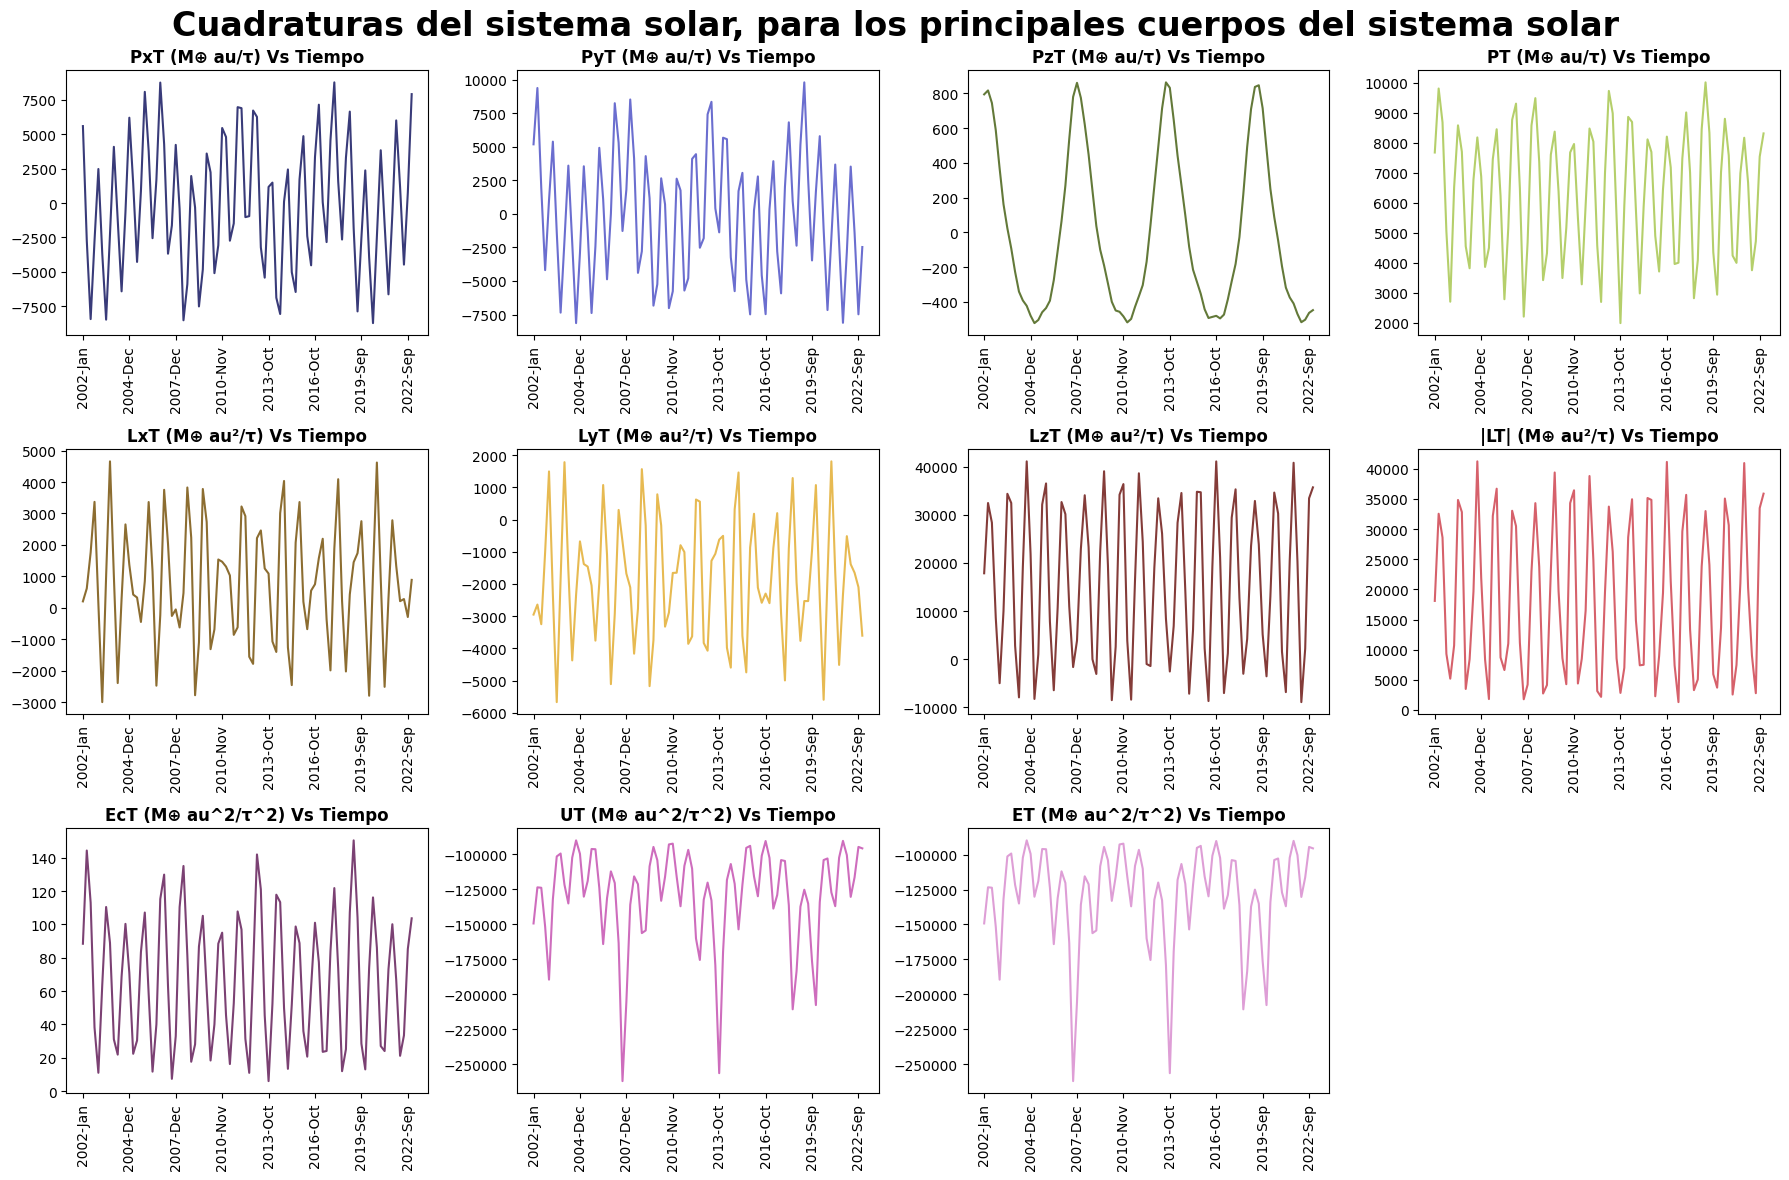

In [8]:
# Iniciando el entorno(Layout) para graficar
fig = plt.figure(figsize=(18, 12))

# Extrayendo la información de las fechas y llevándolas al formato correcto
dates = df_planets_sun_information['datetime_str'].values.tolist()
formatted_dates = [datetime.strptime(date.split()[1], '%Y-%b-%d').strftime('%Y-%b') for date in dates]

# Lista de ejes para manipulación posterior
ax_list = []

# Definiendo el colormap
color_map = plt.get_cmap('tab20b', 11)

# Función para crear subplots con las carcateristicas necesarias
def create_subplot(position, data, title):
    ax = plt.subplot(3, 4, position)
    ax.plot(formatted_dates, data, color=color_map(position-1))
    ax.set_title(title, fontweight='bold')
    ax_list.append(ax)

# Creando subplots
create_subplot(1, df_planets_sun_information['PxT (M⊕ au/τ)'], 'PxT (M⊕ au/τ) Vs Tiempo')
create_subplot(2, df_planets_sun_information['PyT (M⊕ au/τ)'], 'PyT (M⊕ au/τ) Vs Tiempo')
create_subplot(3, df_planets_sun_information['PzT (M⊕ au/τ)'], 'PzT (M⊕ au/τ) Vs Tiempo')
create_subplot(4, df_planets_sun_information['PT (M⊕ au/τ)'], 'PT (M⊕ au/τ) Vs Tiempo')
create_subplot(5, df_planets_sun_information['LxT (M⊕ au²/τ)'], 'LxT (M⊕ au²/τ) Vs Tiempo')
create_subplot(6, df_planets_sun_information['LyT (M⊕ au²/τ)'], 'LyT (M⊕ au²/τ) Vs Tiempo')
create_subplot(7, df_planets_sun_information['LzT (M⊕ au²/τ)'], 'LzT (M⊕ au²/τ) Vs Tiempo')
create_subplot(8, df_planets_sun_information['|LT| (M⊕ au²/τ)'], '|LT| (M⊕ au²/τ) Vs Tiempo')
create_subplot(9, df_planets_sun_information['EcT (M⊕ au^2/τ^2)'], 'EcT (M⊕ au^2/τ^2) Vs Tiempo')
create_subplot(10, df_planets_sun_information['UT (M⊕ au^2/τ^2)'], 'UT (M⊕ au^2/τ^2) Vs Tiempo')
create_subplot(11, df_planets_sun_information['ET (M⊕ au^2/τ^2)'], 'ET (M⊕ au^2/τ^2) Vs Tiempo')

# Ajuste de las etiquetas del eje x para todos los subplots
for ax in ax_list:
    ax.set_xticks(ax.get_xticks()[::len(formatted_dates)//7])  # Asegura que solo se muestren alrededor de 7 ticks
    ax.set_xticklabels([formatted_dates[int(tick)] for tick in ax.get_xticks()], rotation=90)

fig.suptitle('Cuadraturas del sistema solar, para los principales cuerpos del sistema solar', fontsize=24, fontweight='bold')
plt.tight_layout()  # Asegurar un buen layout para que los subplots no se superpongan

plt.show()


5. El momentum angular total del sistema solar define el Plano de Laplace del sistema. El momentum angular de cada uno de los cuerpos del sistema solar define la inclinación de la órbita osculatriz del cuerpo respecto al plano de Laplace. Calcular, para cada tiempo, el ángulo entre el plano de Laplace y la órbita osculatriz de cada cuerpo (incluyendo el Sol).

Ayuda: el ángulo entre dos vectores se calcula usando la propiedad del producto punto A⋅ B = A B cos θ.

In [22]:
#Para este literal podemos usar el dataframe del literal 2 y 3
#en los cuales esta la información para el momentum angular para cada cuerpo y para todo el sistema solar

#Para este angulo podemos usar el producto punto entre el momentum angular de cada cuerpo y el momentum angular total
#  θ(rad)=arccos(Li.LT/(|Li||LT|))

#Primero definamos la función que realiza el caluclo del angulo
def angle_respect_laplace_plane(row,L_body,L_total):
    dot_product = np.dot(row[L_body], row[L_total])
    norm_a = np.linalg.norm(row[L_body])
    norm_b = np.linalg.norm(row[L_total])
    cosine_similarity = dot_product / (norm_a * norm_b)
    return np.arccos(cosine_similarity)

#Ahora apliquemos la función a cada fila del dataframe
df_planets_sun_information['θ(rad) Mercury'] = df_planets_sun_information.apply(lambda row: angle_respect_laplace_plane(row, 'Mercury.L (M⊕ au²/τ)', 'LT (M⊕ au²/τ)'), axis=1)
df_planets_sun_information['θ(rad) Venus'] = df_planets_sun_information.apply(lambda row: angle_respect_laplace_plane(row, 'Venus.L (M⊕ au²/τ)', 'LT (M⊕ au²/τ)'), axis=1)
df_planets_sun_information['θ(rad) Earth'] = df_planets_sun_information.apply(lambda row: angle_respect_laplace_plane(row, 'Earth.L (M⊕ au²/τ)', 'LT (M⊕ au²/τ)'), axis=1)
df_planets_sun_information['θ(rad) Mars'] = df_planets_sun_information.apply(lambda row: angle_respect_laplace_plane(row, 'Mars.L (M⊕ au²/τ)', 'LT (M⊕ au²/τ)'), axis=1)
df_planets_sun_information['θ(rad) Jupiter'] = df_planets_sun_information.apply(lambda row: angle_respect_laplace_plane(row, 'Jupiter.L (M⊕ au²/τ)', 'LT (M⊕ au²/τ)'), axis=1)
df_planets_sun_information['θ(rad) Saturn'] = df_planets_sun_information.apply(lambda row: angle_respect_laplace_plane(row, 'Saturn.L (M⊕ au²/τ)', 'LT (M⊕ au²/τ)'), axis=1)
df_planets_sun_information['θ(rad) Uranus'] = df_planets_sun_information.apply(lambda row: angle_respect_laplace_plane(row, 'Uranus.L (M⊕ au²/τ)', 'LT (M⊕ au²/τ)'), axis=1)
df_planets_sun_information['θ(rad) Neptune'] = df_planets_sun_information.apply(lambda row: angle_respect_laplace_plane(row, 'Neptune.L (M⊕ au²/τ)', 'LT (M⊕ au²/τ)'), axis=1)
df_planets_sun_information['θ(rad) sun'] = df_planets_sun_information.apply(lambda row: angle_respect_laplace_plane(row, 'sun.L (M⊕ au²/τ)', 'LT (M⊕ au²/τ)'), axis=1)


#Mostrando la información
print('Dataframe con la información de los angulos de las osculatrices respecto al plano de Laplace')
df_planets_sun_information[['datetime_str','θ(rad) Mercury','θ(rad) Venus','θ(rad) Earth','θ(rad) Mars','θ(rad) Jupiter','θ(rad) Saturn','θ(rad) Uranus','θ(rad) Neptune','θ(rad) sun']]

Dataframe con la información de los angulos de las osculatrices respecto al plano de Laplace


,datetime_str,θ(rad) Mercury,θ(rad) Venus,θ(rad) Earth,θ(rad) Mars,θ(rad) Jupiter,θ(rad) Saturn,θ(rad) Uranus,θ(rad) Neptune,θ(rad) sun
0,A.D. 2002-Jan-01 00:00:00.0000,0.119921,0.161923,0.338185,0.135402,2.978452,2.925822,0.151107,0.169435,0.000074
1,A.D. 2002-Apr-01 00:00:00.0000,0.037954,0.060237,1.036420,0.068673,0.079960,0.095974,0.086137,0.090723,0.000102
2,A.D. 2002-Jun-30 00:00:00.0000,0.141559,0.093389,1.421622,0.110270,0.124153,0.145172,3.035121,3.011898,0.000280
3,A.D. 2002-Sep-28 00:00:00.0000,2.719338,0.322999,1.303889,0.368068,0.371172,0.416942,2.773134,2.749135,0.001170
4,A.D. 2002-Dec-27 00:00:00.0000,2.907944,2.780099,2.928985,2.845322,0.247677,0.317205,2.863079,2.843306,0.000176
...,...,...,...,...,...,...,...,...,...,...
81,A.D. 2021-Dec-17 00:00:00.0000,0.038890,1.061998,0.476337,0.056106,0.056794,0.057199,3.059478,0.066899,0.000123
82,A.D. 2022-Mar-17 00:00:00.0000,2.964116,3.042364,2.221631,2.976780,2.984481,2.985645,2.985479,2.985736,0.001428
83,A.D. 2022-Jun-15 00:00:00.0000,0.636163,0.655116,1.925401,0.654073,0.678778,2.628574,0.651405,0.754128,0.005373
84,A.D. 2022-Sep-13 00:00:00.0000,3.023111,0.075431,1.033091,0.091492,3.072981,3.080661,3.070921,3.075825,0.000054


6. Haga un gráfico del ángulo de la órbita osculatriz de cada cuerpo como función del tiempo.

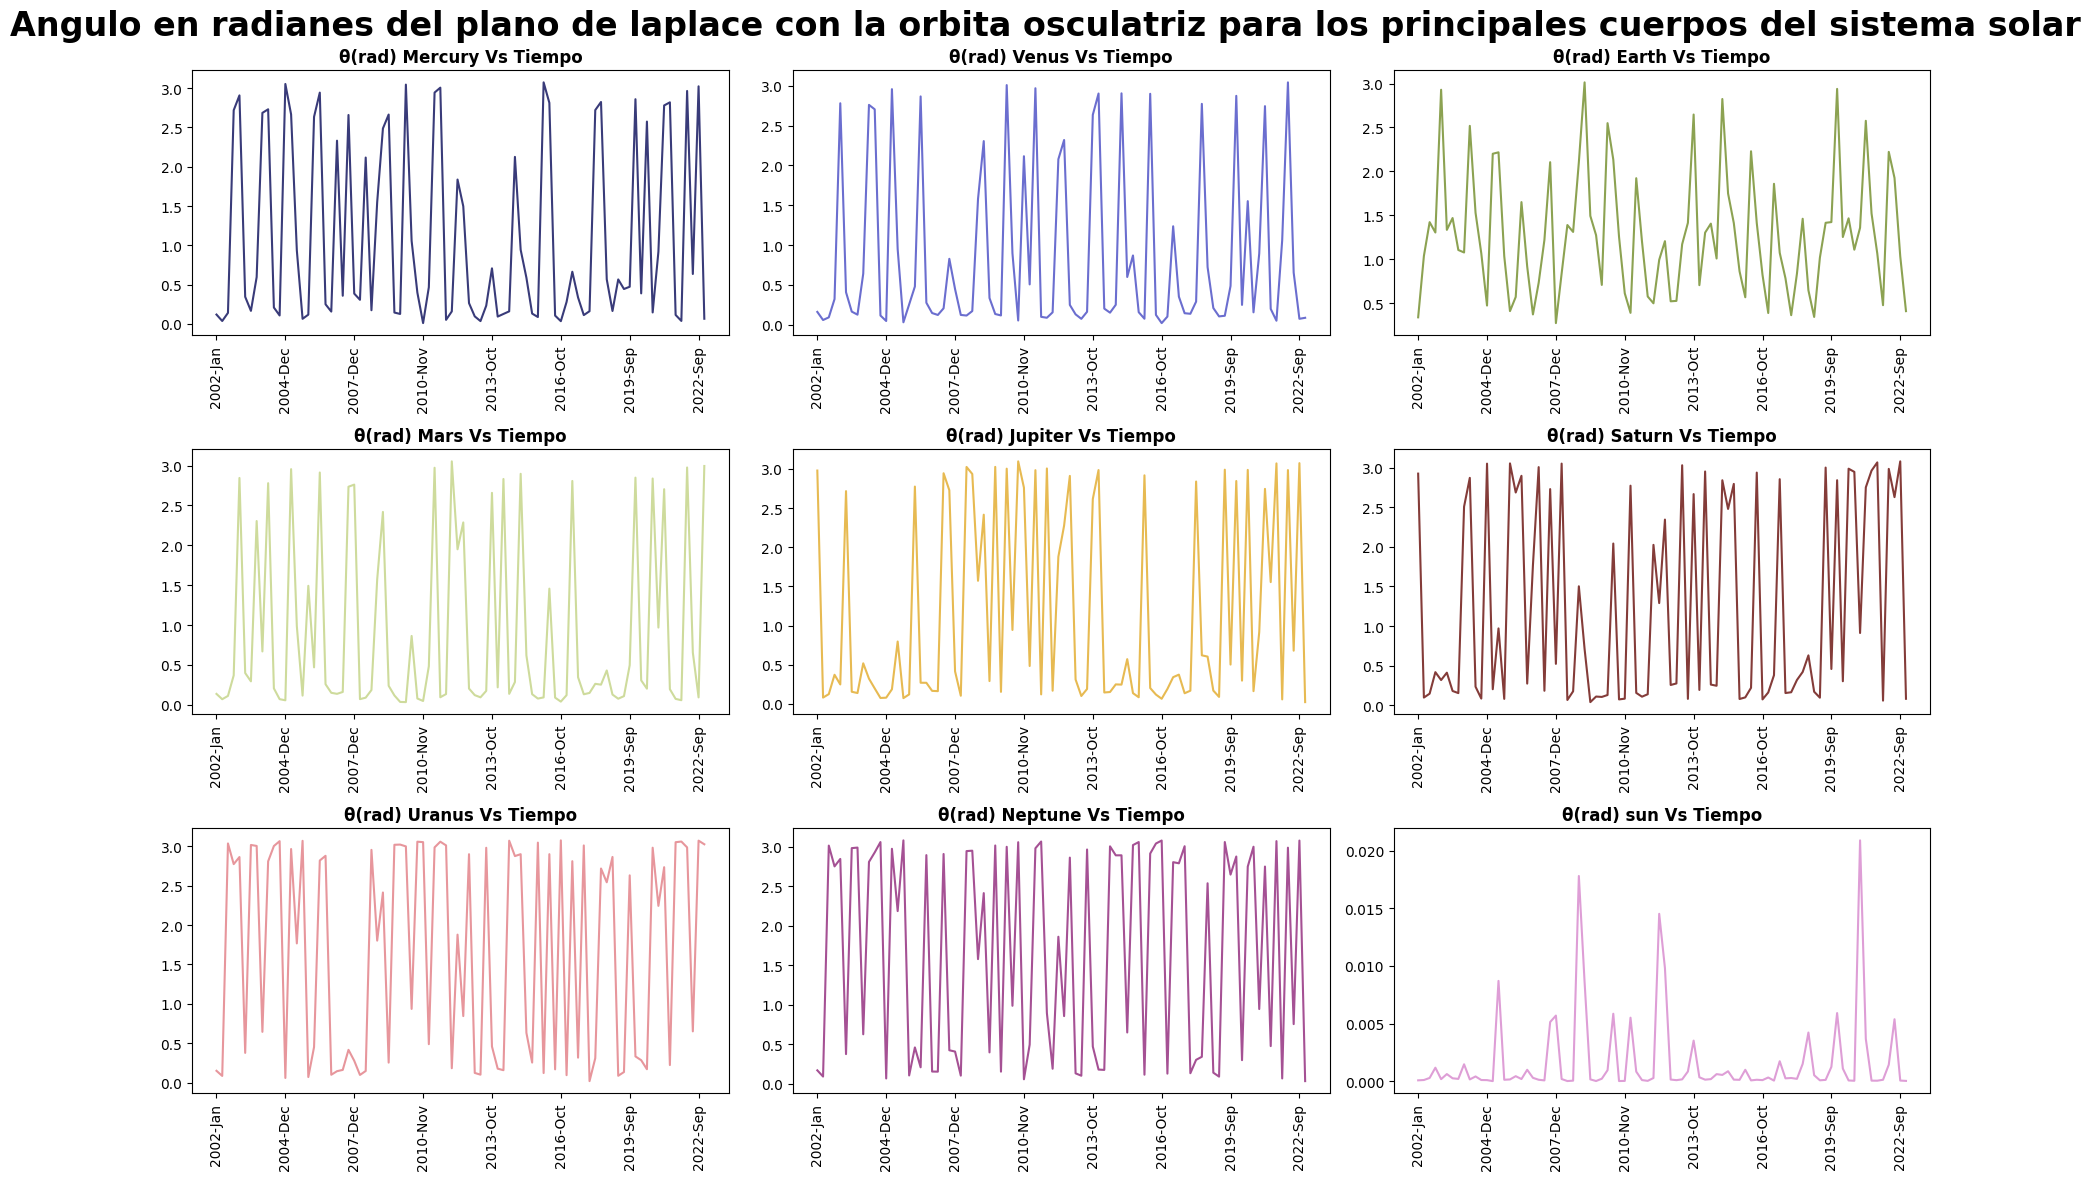

In [10]:

# Iniciando el entorno(Layout) para graficar
fig = plt.figure(figsize=(18, 12))

# Extrayendo la información de las fechas y llevándolas al formato correcto
dates = df_planets_sun_information['datetime_str'].values.tolist()
formatted_dates = [datetime.strptime(date.split()[1], '%Y-%b-%d').strftime('%Y-%b') for date in dates]

# Lista de ejes para manipulación posterior
ax_list = []

# Definiendo el colormap
color_map = plt.get_cmap('tab20b', 9)

# Función para crear subplots con el colormap
def create_subplot(position, data, title):
    ax = plt.subplot(3, 3, position)
    ax.plot(formatted_dates, data, color=color_map(position-1))
    ax.set_title(title, fontweight='bold')
    ax_list.append(ax)

# Creando subplots
create_subplot(1, df_planets_sun_information['θ(rad) Mercury'], 'θ(rad) Mercury Vs Tiempo')
create_subplot(2, df_planets_sun_information['θ(rad) Venus'], 'θ(rad) Venus Vs Tiempo')
create_subplot(3, df_planets_sun_information['θ(rad) Earth'], 'θ(rad) Earth Vs Tiempo')
create_subplot(4, df_planets_sun_information['θ(rad) Mars'], 'θ(rad) Mars Vs Tiempo')
create_subplot(5, df_planets_sun_information['θ(rad) Jupiter'], 'θ(rad) Jupiter Vs Tiempo')
create_subplot(6, df_planets_sun_information['θ(rad) Saturn'], 'θ(rad) Saturn Vs Tiempo')
create_subplot(7, df_planets_sun_information['θ(rad) Uranus'], 'θ(rad) Uranus Vs Tiempo')
create_subplot(8, df_planets_sun_information['θ(rad) Neptune'], 'θ(rad) Neptune Vs Tiempo')
create_subplot(9, df_planets_sun_information['θ(rad) sun'], 'θ(rad) sun Vs Tiempo')

# Ajuste de las etiquetas del eje x para todos los subplots
for ax in ax_list:
    ax.set_xticks(ax.get_xticks()[::len(formatted_dates)//7])  # Asegura que solo se muestren alrededor de 7 ticks
    ax.set_xticklabels([formatted_dates[int(tick)] for tick in ax.get_xticks()], rotation=90)

fig.suptitle('Angulo en radianes del plano de laplace con la orbita osculatriz para los principales cuerpos del sistema solar', fontsize=24, fontweight='bold')
plt.tight_layout()  # Asegurar un buen layout para que los subplots no se superpongan

plt.show()


7. Calcule el valor promedio de la inclinación orbital de cada planeta en grados respecto al plano invariante de Laplace.

In [11]:
#Para los calculos de este literal podemos usar el dataframe del literal 5

#Extrayendo las columnas utiles de nuestro dataframe
df_angles=df_planets_sun_information[['θ(rad) Mercury','θ(rad) Venus','θ(rad) Earth','θ(rad) Mars','θ(rad) Jupiter','θ(rad) Saturn','θ(rad) Uranus','θ(rad) Neptune','θ(rad) sun']]
df_average_angles=df_angles.mean(axis=0)
#for i in list(df_angles.columns):

df_avg_angles = pd.DataFrame(df_average_angles)
df_avg_angles = df_avg_angles.rename(columns={df_avg_angles.columns[0]: 'average_angles_respect_lablace_plane'})

#Mostrando la información
print('Dataframe con la información de los angulos promedios de las osculatrices respecto al plano de Laplace')
df_avg_angles

,average_angles_respect_lablace_plane
θ(rad) Mercury,1.112455
θ(rad) Venus,0.859135
θ(rad) Earth,1.282297
θ(rad) Mars,0.889148
θ(rad) Jupiter,1.134135
θ(rad) Saturn,1.239183
θ(rad) Uranus,1.680607
θ(rad) Neptune,1.676257
θ(rad) sun,0.001745


8. Verificar si el sistema solar es un sistema ligado o virializado

In [12]:
# Para esto debemos usar la información de la energía 
# Primero extraigamos la columna que necesitamos de nuestro dataframe
df_energy = df_planets_sun_information[['EcT (M⊕ au^2/τ^2)','UT (M⊕ au^2/τ^2)','ET (M⊕ au^2/τ^2)']]

# Ahora saquemos la energía promedio con las filas del dataframe
df_average_energy = df_energy.mean(axis=0)

df_avg_energy = pd.DataFrame(df_average_energy)
df_avg_energy = df_avg_energy.rename(columns={df_avg_energy.columns[0]: 'average_energies'})

# Crear una nueva fila
new_row = pd.DataFrame({'average_energies': [2*df_avg_energy.iloc[0,0]]}, index=['2*EcT (M⊕ au^2/τ^2)'])

# Concatenar la nueva fila
df_avg_energy = pd.concat([df_avg_energy, new_row])

#Mostrando la información
print('Dataframe con la información de las energías promedios del sistema solar')
df_avg_energy

,average_energies
EcT (M⊕ au^2/τ^2),66.626567
UT (M⊕ au^2/τ^2),-129489.209793
ET (M⊕ au^2/τ^2),-129422.583226
2*EcT (M⊕ au^2/τ^2),133.253135


Como se puede observar en el DataFrame anterior no se cumplen las condiciones de que:

$$<U> \neq -2<K>$$
$$E \neq -<K>$$

por tanto el sistema solar no esta virializado

- Gráfico de las órbitas de los planetas.

In [13]:
#Para este ejercicio podemos usar los datos de las posiciones de los planetas provenientes de astropy
# Lista de IDs de los planetas
id_planets = list(np.arange(199, 999, 100))


# Diccionario con los nombres de los planetas para una mejor identificación
planet_Period_in_days = {
    199: 88+20,          # Mercury
    299: 225+20,         # Venus
    399: 365.25+20,      # Earth
    499: 687+20,         # Mars
    599: 11.9 * 365.25+20,  # Jupiter
    699: 29.5 * 365.25+20,  # Saturn
    799: 84 * 365.25+20,    # Uranus
    899: 165 * 365.25+20,   # Neptune
}


#Creando el Dataframe con la información de las posiciones de los planetas
df_position_planets = None
for i in id_planets:
    # Extrayendo los datos de los planetas en referencia al baricentro del sistema solar
    fecha_inicial = datetime.strptime('2002-01-01', '%Y-%m-%d')
    fecha_final = fecha_inicial + timedelta(days=planet_Period_in_days[i])
    step=math.ceil(planet_Period_in_days[i]/200)
    
    information = Horizons(id=str(i), location='0', epochs={'start': f'{fecha_inicial}', 'stop': f'{fecha_final}', 'step': f'{step}d'}).vectors().to_pandas()[['datetime_str', 'x', 'y', 'z']]
    
    # Cambiar nombres de columnas para identificar a qué planeta pertenecen y agregar unidades correctamente
    columns = {}
    for col in information.columns:
        if col in ['x', 'y', 'z']:       
            columns[col] = f'{planet_names[i]}.{col} (au)'
    
    information = information.rename(columns=columns)    
     # Si el DataFrame final está vacío, toca ponerle la información del primer planeta (Mercurio)
    if df_position_planets is None:
        df_position_planets = information
    else:
        # Combinar DataFrames basado en la columna datetime_str
        df_position_planets = df_position_planets.merge(information, on='datetime_str', how='outer')


#Mostrando la información
print('Dataframe con la información de las posiciones de los planetas en el sistema solar')
df_position_planets

,datetime_str,Mercury.x (au),Mercury.y (au),Mercury.z (au),Venus.x (au),Venus.y (au),Venus.z (au),Earth.x (au),Earth.y (au),Earth.z (au),Mars.x (au),Mars.y (au),Mars.z (au),Jupiter.x (au),Jupiter.y (au),Jupiter.z (au),Saturn.x (au),Saturn.y (au),Saturn.z (au),Uranus.x (au),Uranus.y (au),Uranus.z (au),Neptune.x (au),Neptune.y (au),Neptune.z (au)
0,A.D. 2002-Jan-01 00:00:00.0000,0.530696,-1.109092,-0.044066,0.212419,-1.693480,-0.011990,0.000005,-0.000037,-0.00002,1.456362,-0.339910,-0.018315,-0.773198,4.115578,0.000142,2.899686,7.672785,-0.25862,16.413548,-12.621713,-0.253768,18.821012,-24.592550,0.056900
1,A.D. 2002-Jan-02 00:00:00.0000,0.551905,-1.078047,-0.042170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A.D. 2002-Jan-03 00:00:00.0000,0.571093,-1.046078,-0.040044,0.286756,-1.683626,-0.014261,0.000006,-0.000037,-0.00002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A.D. 2002-Jan-04 00:00:00.0000,0.588151,-1.013321,-0.037687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A.D. 2002-Jan-05 00:00:00.0000,0.602973,-0.979925,-0.035105,0.360605,-1.670356,-0.016489,0.000006,-0.000037,-0.00002,1.501136,-0.270394,-0.016594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,A.D. 2163-Mar-28 00:00:00.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.280050,-25.894374,0.182489
1042,A.D. 2164-Jan-24 00:00:00.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.601358,-26.320054,0.154009
1043,A.D. 2164-Nov-21 00:00:00.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.340334,-25.780048,0.125058
1044,A.D. 2165-Sep-19 00:00:00.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.650681,-24.297905,0.095624


Text(0.5, 0.92, 'Trayectorias de los planetas del sistema solar, respecto al sol')

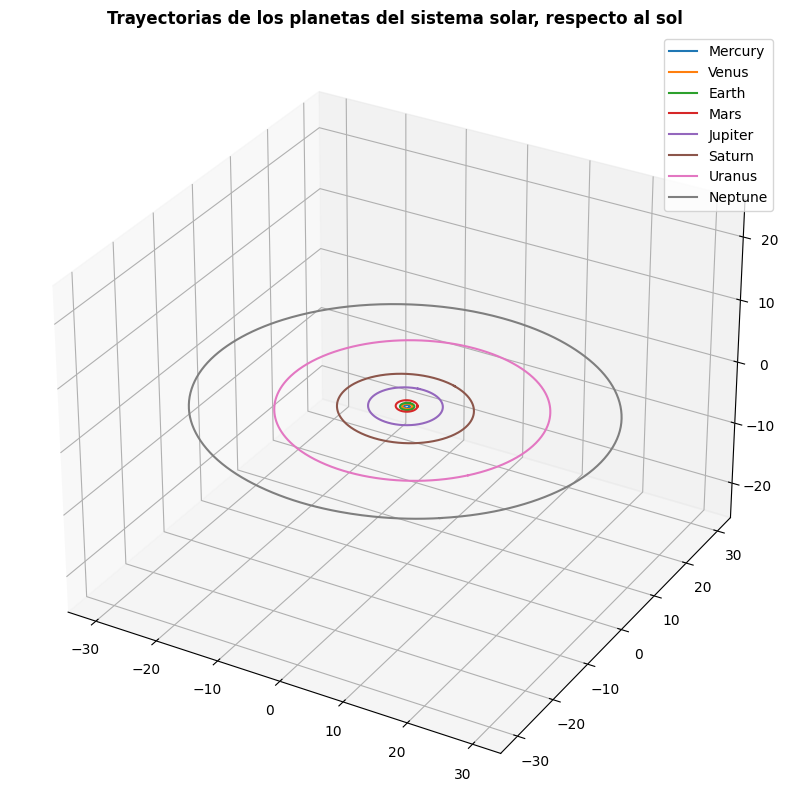

In [23]:
#Para este ejercicio podemos usar los datos de las posiciones de los planetas provenientes de astropy
# Lista de IDs de los planetas
id_planets = list(np.arange(199, 999, 100))


# Diccionario con los nombres de los planetas para una mejor identificación
planet_Period_in_days = {
    199: 88+20,          # Mercury
    299: 225+20,         # Venus
    399: 365.25+20,      # Earth
    499: 687+20,         # Mars
    599: 11.9 * 365.25+20,  # Jupiter
    699: 29.5 * 365.25+20,  # Saturn
    799: 84 * 365.25+20,    # Uranus
    899: 165 * 365.25+20,   # Neptune
}

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

#Creando el Dataframe con la información de las posiciones de los planetas
df_position_planets = None
for i in id_planets:
    # Extrayendo los datos de los planetas en referencia al baricentro del sistema solar
    fecha_inicial = datetime.strptime('2002-01-01', '%Y-%m-%d')
    fecha_final = fecha_inicial + timedelta(days=planet_Period_in_days[i])
    step=math.ceil(planet_Period_in_days[i]/500)
    
    information = Horizons(id=str(i), location='@Sun', epochs={'start': f'{fecha_inicial}', 'stop': f'{fecha_final}', 'step': f'{step}d'}).vectors().to_pandas()[['datetime_str', 'x', 'y', 'z']]
    
    # Cambiar nombres de columnas para identificar a qué planeta pertenecen y agregar unidades correctamente
    ax.plot(information['x'], information['y'], information['z'], label=planet_names[i])
    ax.axis('equal')
ax.legend()
ax.set_title("Trayectorias de los planetas del sistema solar, respecto al sol", fontweight='bold')


Ahora el mismo gráfico con respecto al baricentro del sistema solar

Text(0.5, 0.92, 'Trayectorias de los planetas del sistema solar con respecto al baricentro')

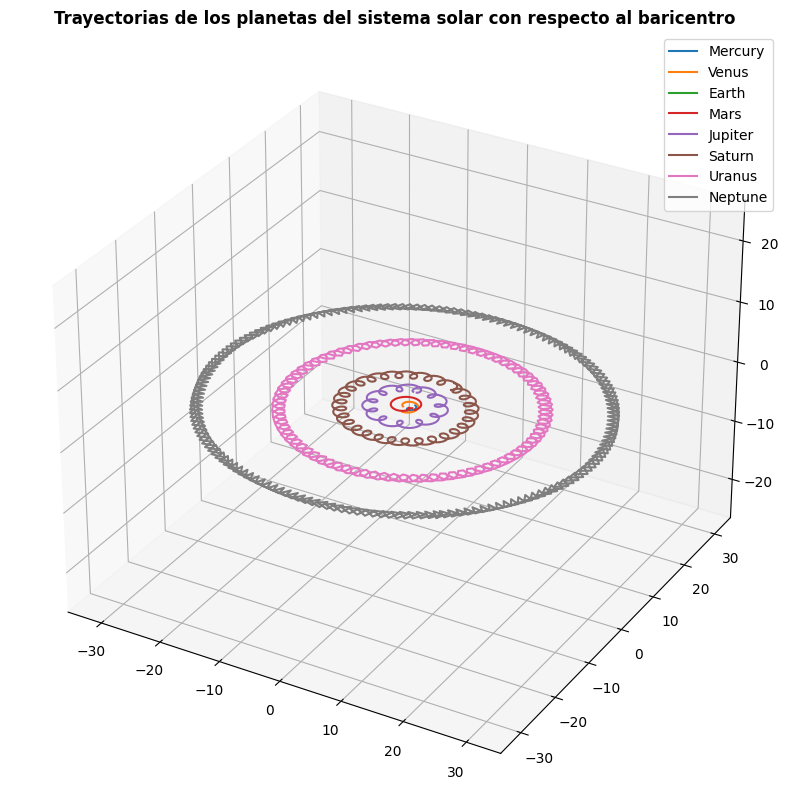

In [16]:
#Para este ejercicio podemos usar los datos de las posiciones de los planetas provenientes de astropy
# Lista de IDs de los planetas
id_planets = list(np.arange(199, 999, 100))


# Diccionario con los nombres de los planetas para una mejor identificación
planet_Period_in_days = {
    199: 88+20,          # Mercury
    299: 225+20,         # Venus
    399: 365.25+20,      # Earth
    499: 687+20,         # Mars
    599: 11.9 * 365.25+20,  # Jupiter
    699: 29.5 * 365.25+20,  # Saturn
    799: 84 * 365.25+20,    # Uranus
    899: 165 * 365.25+20,   # Neptune
}

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

#Creando el Dataframe con la información de las posiciones de los planetas
df_position_planets = None
for i in id_planets:
    # Extrayendo los datos de los planetas en referencia al baricentro del sistema solar
    fecha_inicial = datetime.strptime('2002-01-01', '%Y-%m-%d')
    fecha_final = fecha_inicial + timedelta(days=planet_Period_in_days[i])
    step=math.ceil(planet_Period_in_days[i]/500)
    
    information = Horizons(id=str(i), location='0', epochs={'start': f'{fecha_inicial}', 'stop': f'{fecha_final}', 'step': f'{step}d'}).vectors().to_pandas()[['datetime_str', 'x', 'y', 'z']]
    
    # Cambiar nombres de columnas para identificar a qué planeta pertenecen y agregar unidades correctamente
    ax.plot(information['x'], information['y'], information['z'], label=planet_names[i])
    ax.axis('equal')
ax.legend()
ax.set_title("Trayectorias de los planetas del sistema solar con respecto al baricentro", fontweight='bold')
